In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
from math import sqrt
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def read_csv(directory_name , fileName):
    '''
    Read the file from a directory given directory name and file name, we collected all the data in one directory 
    '''
    read_file = directory_name + '/' + fileName + '.csv'
    df = pd.read_csv(read_file)                          # Create a DataFrame for return value 
    del df['Unnamed: 7']                                 # delete unknown columns to make DataFrame clean  
    
    return df                                            # return the DataFrame

In [3]:
# read_csv('sensor data' , '上楼梯口袋1')

In [4]:
def Butterworth_filter_single_data(data):
    b, a = signal.butter(3, 0.05, btype='lowpass', analog=False)
    low_passed = signal.filtfilt(b, a, data)
    return low_passed

def Butterworth_filter(df):
    df['ax'] = Butterworth_filter_single_data(df['ax'])
    df['ay'] = Butterworth_filter_single_data(df['ay'])
    df['az'] = Butterworth_filter_single_data(df['az'])
    df['wx'] = Butterworth_filter_single_data(df['wx'])
    df['wy'] = Butterworth_filter_single_data(df['wy'])
    df['wz'] = Butterworth_filter_single_data(df['wz'])
    df['aT'] = Butterworth_filter_single_data(df['aT'])
    return df

In [5]:
def get_total_acc(data):
    data['aT'] = np.sqrt(data['ax']**2 + data['ay']**2 + data['az']**2)
    return data

In [6]:
# Butterworth_filter(get_total_acc(read_csv('sensor data' , '上楼梯口袋1')))

In [7]:
def plot_acceleration(data):
    plt.figure(figsize = (30, 30))
    plt.subplot(4 , 1 , 1)
    plt.plot(data['time'] , data['ax'] , 'r.' , alpha = 0.5)
    # plt.plot(data['time'] , Butterworth_filter(data['ax']) , 'b.' , alpha = 0.5)
    plt.title('X axis acceleration')
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(m/s^2)')
    plt.subplot(4 , 1 , 2)
    plt.plot(data['time'] , data['ay'] , 'g.' , alpha = 0.5)
    plt.title('Y axis acceleration')
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(m/s^2)')
    plt.subplot(4 , 1 , 3)
    plt.plot(data['time'] , data['az'] , 'b.' , alpha = 0.5)
    plt.title('Z axis acceleration')
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(m/s^2)')
    plt.subplot(4 , 1 , 4)
    plt.plot(data['time'] , data['aT'] , 'k.' , alpha = 0.5)
    plt.title('Total acceleration')
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(m/s^2)')

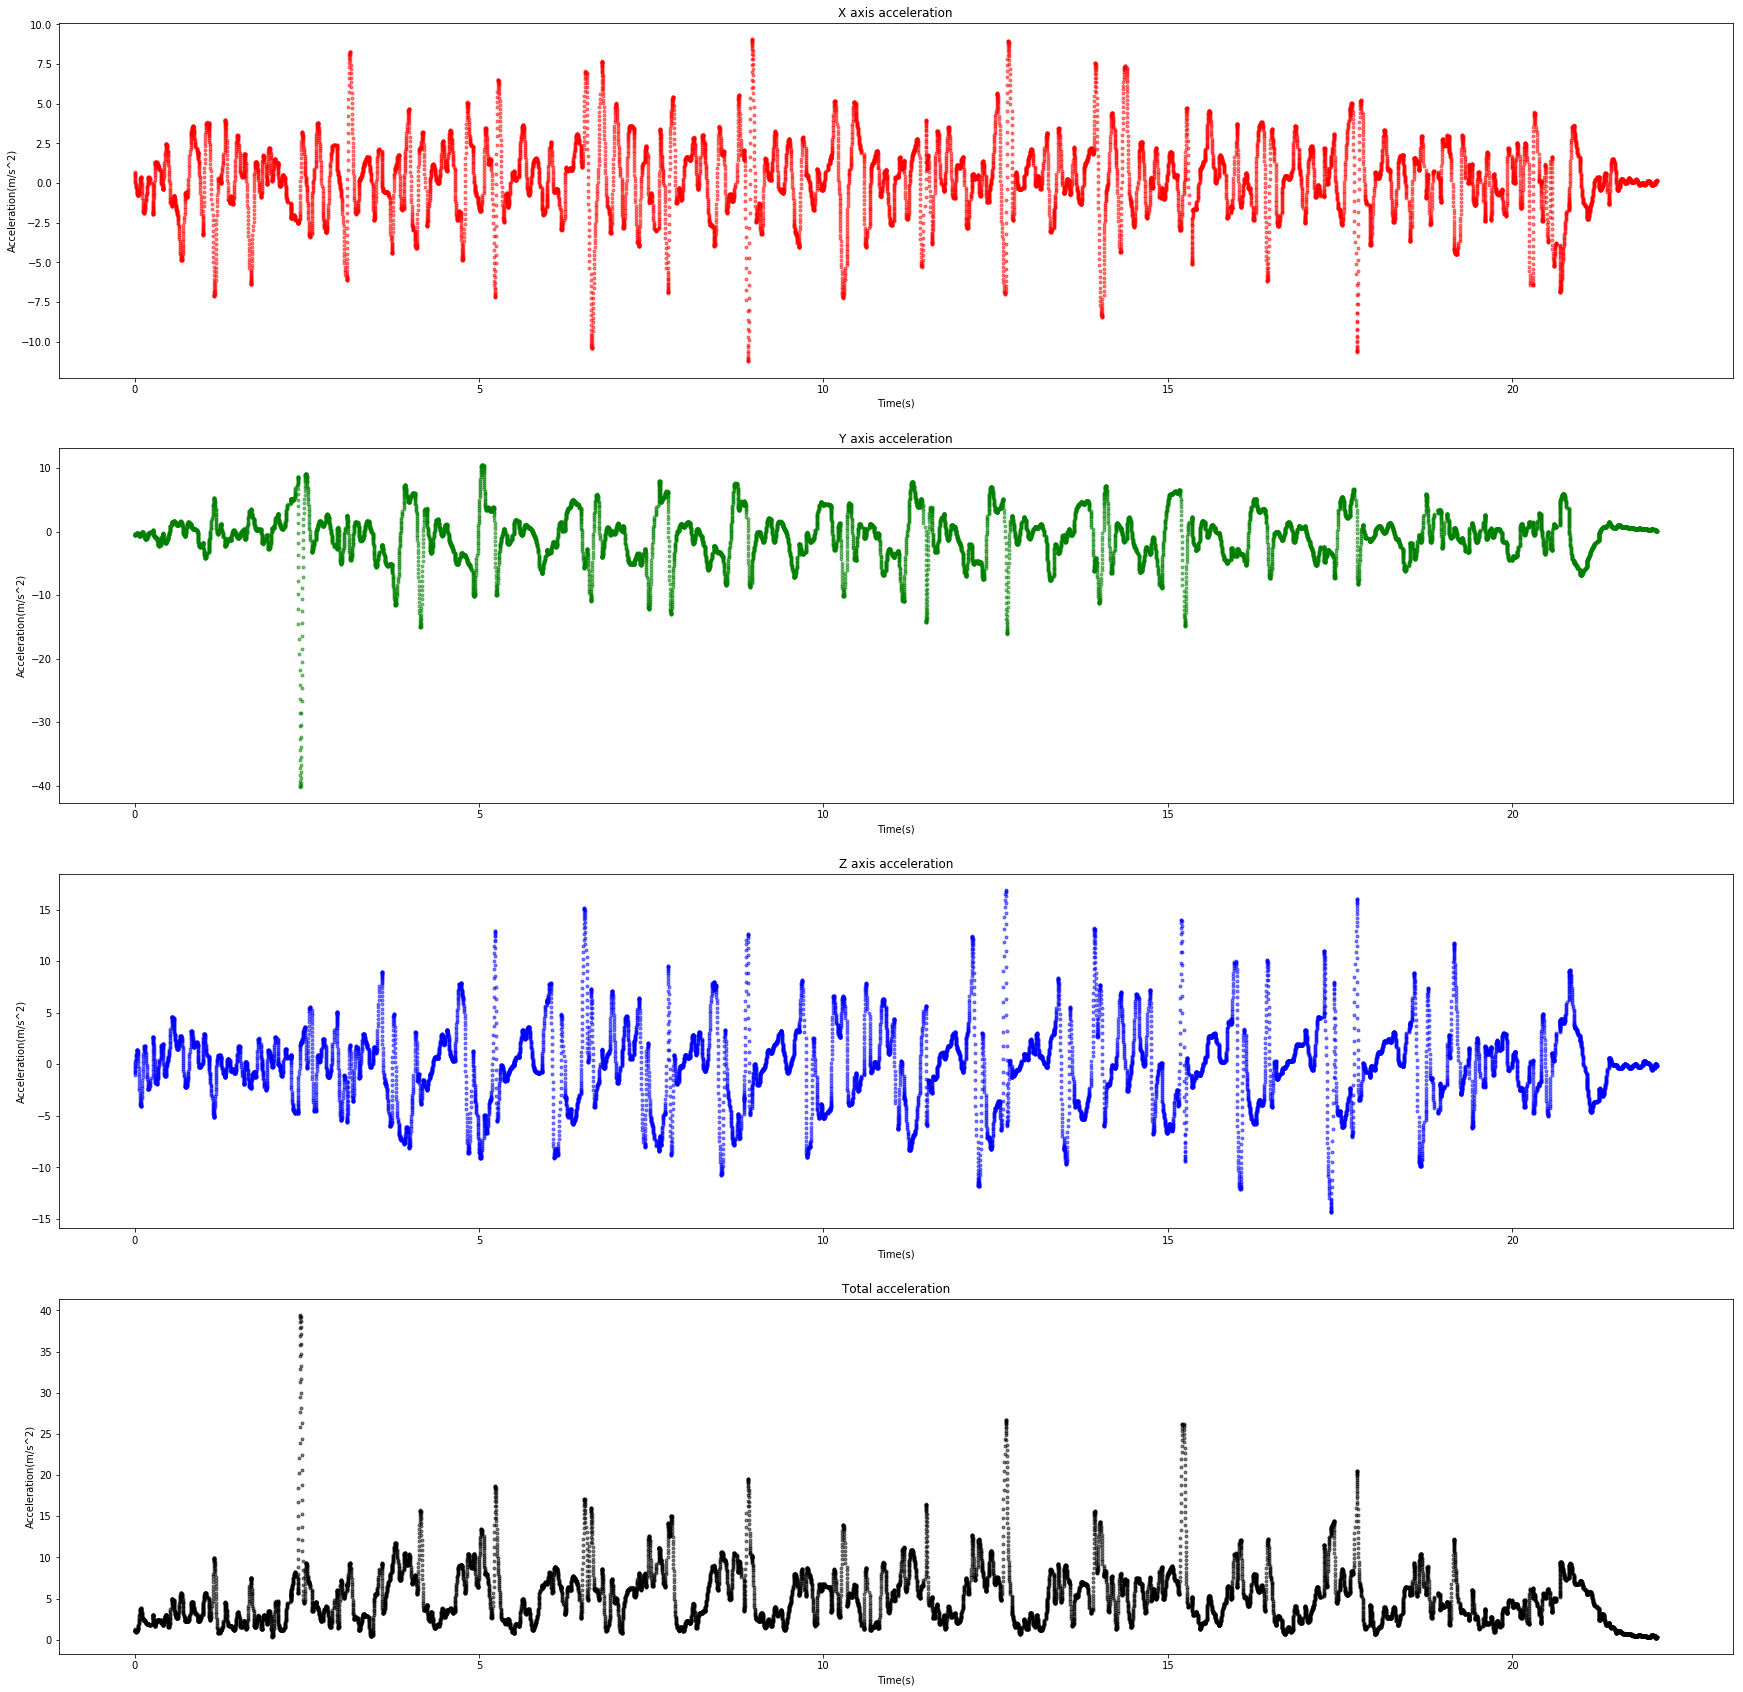

In [8]:
plot_acceleration(Butterworth_filter(get_total_acc(read_csv('sensor data' , '上楼梯口袋1'))))
#plot_acceleration(get_total_acc(read_csv('sensor data' , '上楼梯口袋1')))